In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [54]:
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical

這是 Bag


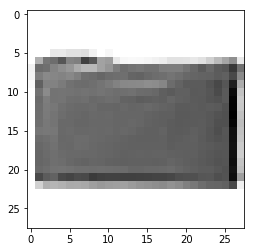

In [69]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

n = 1234
print('這是', class_names[y_train[n]])
plt.imshow(x_train[n], cmap='Greys')

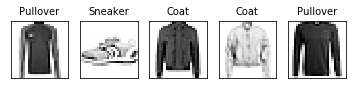

In [56]:
pick = np.random.choice(60000, 5, replace=False)

for i in range(5):
    n = pick[i]
    ax = plt.subplot(151+i)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title(class_names[y_train[n]], fontsize=10)
    plt.imshow(x_train[n], cmap='Greys')

In [57]:
x_train.shape
x_test.shape
x_test[1]
# 255 色彩範圍為0~255
# 將矩陣轉範圍為0-1
x_train = x_train/255
x_test = x_test/255
# reshape
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
# y 值轉成 one-hot encoding
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [58]:
# activation = relu
# layer 1: 200 neurons
# layer 2: 100 neurons
# output layer: neurons
model = Sequential()
model.add(Dense(200, input_dim=784, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 200)               157000    
_________________________________________________________________
dense_7 (Dense)              (None, 100)               20100     
_________________________________________________________________
dense_8 (Dense)              (None, 10)                1010      
Total params: 178,110
Trainable params: 178,110
Non-trainable params: 0
_________________________________________________________________


In [59]:
model.compile(loss='mse', optimizer=SGD(lr=0.05), metrics=['accuracy'])
train_result = model.fit(x_train, y_train, batch_size=100, epochs=20)

Train on 60000 samples
Epoch 1/20
60000/60000 [==============================] - 1s 17us/sample - loss: 0.0759 - accuracy: 0.4545
Epoch 2/20
60000/60000 [==============================] - 1s 14us/sample - loss: 0.0500 - accuracy: 0.6601
Epoch 3/20
60000/60000 [==============================] - 1s 14us/sample - loss: 0.0416 - accuracy: 0.7117
Epoch 4/20
60000/60000 [==============================] - 1s 14us/sample - loss: 0.0369 - accuracy: 0.7635
Epoch 5/20
60000/60000 [==============================] - 1s 14us/sample - loss: 0.0336 - accuracy: 0.7874
Epoch 6/20
60000/60000 [==============================] - 1s 14us/sample - loss: 0.0313 - accuracy: 0.8012
Epoch 7/20
60000/60000 [==============================] - 1s 15us/sample - loss: 0.0297 - accuracy: 0.8106
Epoch 8/20
60000/60000 [==============================] - 1s 15us/sample - loss: 0.0284 - accuracy: 0.8163
Epoch 9/20
60000/60000 [==============================] - 1s 15us/sample - loss: 0.0274 - accuracy: 0.8217
Epoch 10/20
60

In [63]:
result = model.predict_classes(x_test)

這是 Sneaker


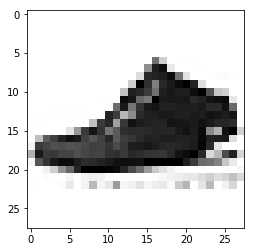

In [66]:
n = 3339
print('這是', class_names[result[n]])
plt.imshow(x_test[n].reshape(28,28), cmap = 'Greys')

In [60]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.0243319746568799
Test accuracy: 0.8328


In [70]:
from sklearn import metrics
print('\n\n the result \n\n Confusion Matrix\n\n',metrics.confusion_matrix(result, y_test))



 the result 

 Confusion Matrix

 [[831   5  21  37   3   1 177   0   5   0]
 [  4 947   3  14   3   0   2   0   1   0]
 [ 14  12 769  14 139   0 138   0  15   0]
 [ 47  26   9 862  41   2  43   0   8   0]
 [  6   6 127  32 735   0 115   0   2   0]
 [  3   0   1   1   2 906   2  41   3  17]
 [ 73   2  53  35  69   0 488   0  11   0]
 [  0   0   0   0   0  52   0 907   6  48]
 [ 22   2  17   5   8   5  35   0 949   1]
 [  0   0   0   0   0  34   0  52   0 934]]


Text(0.5,0,'epoch')

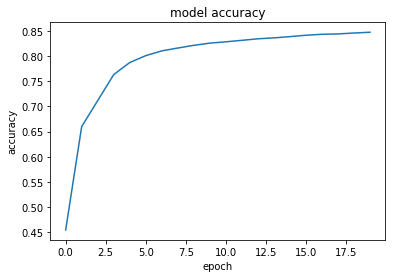

In [62]:
# summarize history for accuracy
plt.plot(train_result.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')